In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import random
from state_gen import print_board, getkey
from pinwheel import pinwheel, sample
import solve_dp as dp
from itertools import count


# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

In [2]:
colors = [2,3,4,5]
def show_screen(g):
    screen = np.zeros((g.nrows, g.ncols))
    for i in range(g.nrows):
        for j in range(g.ncols):
            if g.board[i][j] != 'x':
                screen[i,j] = 1.0
    for a in range(g.nagents):
        i, j = g.pos[a]
        screen[i,j] = colors[int(a)]
    plt.clf()
    fig = plt.figure(1)
    plt.imshow(screen)
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())
    

In [3]:
def test_game(g,pi):
        g.init_ep(g.starts)
        for t in count():
            show_screen(g)
            if g.isTerminal() or t > 50:
                return t
            i = sample( pi[getkey(g.board)])
            agent_actions = g.actions[i]
            sn, r = g.move1(agent_actions)



In [4]:
def test_game_multi_agent(g,agents):
        g.init_ep(g.starts)
        for t in count():
            show_screen(g)
            if g.isTerminal() or t > 50:
                return t
            agent_actions = []
            for i in range(g.nagents):
                agent_actions.append(sample( agents[i].pi[getkey(g.board)]))
            sn, r = g.move1(agent_actions)

In [5]:
def marl_policy_iteration(g, agents, gamma):
    samepi = False
    count = 0
    while not samepi:
        dp.calculateV(agents, g, gamma)
        samepi = True
        for i in range(g.nagents):
            if not dp.calculatePi(agents, i, g, gamma):
                samepi = False
        count += 1
    print(count)
        
    

In [6]:
def marl_policy_iteration_fixed(g, agents, gamma):
    samepi = False
    count = 0
    while not samepi:
        dp.calculateV(agents, g, gamma)
        samepi = True
        #for i in range(g.nagents):
        if not dp.calculatePi(agents, 0, g, gamma):
            samepi = False
        count += 1
    print(count)

In [7]:
config = pickle.load( open("games/2.game.p", "rb") )
g = pinwheel(config)

In [ ]:
v, pi = dp.value_iteration(g, config['v'], 0.9)
test_game(g,pi)

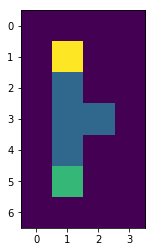

30

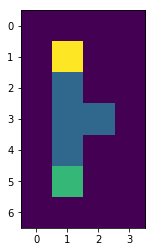

In [8]:
agents = [dp.Agent(g.states, i) for i in range(g.nagents)]
marl_policy_iteration_fixed(g, agents, 0.9)
test_game_multi_agent(g, agents)

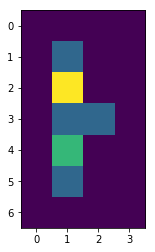

51

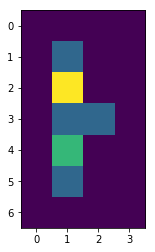

In [9]:
test_game_multi_agent(g, agents)